In [1]:
# import pandas as pd
# import numpy as np
# import math
import matplotlib.pyplot as plt
# import matplotlib
# from lmfit import models
from utils.scopeutil import *
from utils.OOMFormatter import OOMFormatter
from models.T2_simple_model import *
from scipy import stats 

In [2]:
def process_T2_results(stof, verhouding, trim_tail=0, trim_head=0, first_guess=1000, v=False):
    My_delay_pairs = []
    for (delay, df) in get_df_of_all_delays(
            stof,
            verhouding,
            T=T2,
            signal_index=SI_SIGNAL):

        My = My_for_T2_df(df, v)

        if My == -1:
            continue

        # we willen de absolute waarde van alles
        # Er kunnen negatieve waardes zijn ivm meetonzekerheid, deze worden dus weggehaald
        My = max(0, My)

        My_delay_pairs.append((My, delay))

    M0 = My_delay_pairs[0][0]

    My_delay_pairs = My_delay_pairs[trim_tail:-trim_head or len(My_delay_pairs)]

    uncertainties = np.array([0.0 for _ in range(len(My_delay_pairs))])
    uncertainties += voltage_uncertainty_due_to_noise(v)
    weights = 1 / uncertainties

    fit_T2 = model_T2.fit([My for (My, delay) in My_delay_pairs], t=[delay for (My, delay) in My_delay_pairs], M0=M0, T2=first_guess, weights=weights)

    pvalue = 1 - stats.chi2.cdf(fit_T2.chisqr, fit_T2.nfree)

    if v:
        fit_T2.plot()
        print(f"De p waarde is {pvalue:.9f}.")
        print(fit_T2.fit_report())

    return fit_T2, pvalue

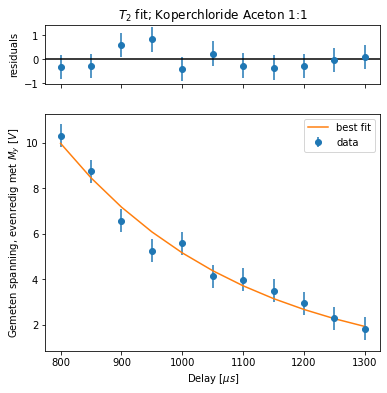

In [3]:
fit_T2, pvalue = process_T2_results(STOF_KOPERCHLORIDE_ACETOON, "1_1", trim_tail=0)

fit_T2.plot(title=r"$T_2$ fit; Koperchloride Aceton 1:1", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_y$ [$V$]")
fit_T2

In [4]:
# fit_T2, pvalue = process_T2_results(STOF_KOPERCHLORIDE_A, "1_0")
# fit_T2.plot(title=r"$T_2$ fit; Koperchloride(A) water 1:1", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_y$ [$V$]")
# fit_T2

In [5]:
# fit_T2, pvalue= process_T2_results(STOF_KOPERCHLORIDE_B, "1_0")
# fit_T2.plot(title=r"$T_2$ fit; Koperchloride(B) (ongemengd)", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_y$ [$V$]")
# fit_T2

In [6]:
# fit_T2, pvalue= process_T2_results(STOF_KOPERCHLORIDE_B, "1_1")
# fit_T2.plot(title=r"$T_2$ fit; Koperchloride(B) water 1:1", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_y$ [$V$]")
# fit_T2

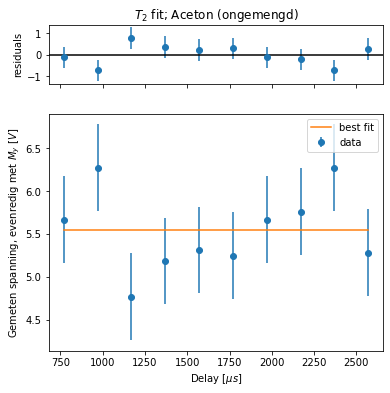

In [7]:
fit_T2, pvalue= process_T2_results(STOF_ACETOON, "1_0", trim_tail=0, trim_head=0)
fit_T2.plot(title=r"$T_2$ fit; Aceton (ongemengd)", xlabel=r"Delay [$\mu s$]", ylabel="Gemeten spanning, evenredig met $M_y$ [$V$]")
fit_T2